# Achievement 6.4 Supervised Machine Learning w/ Linear Regression

### Sections:

- Library Importing & Data Importing
- Data Review and Cleaning (if req.) + Checking for Outliers
- Data Prep for Regression (generatting necessary NumPy Array and Test/Train Datasets)
- Regression Analysis
- Considerations & Iterations

#### One of the questions which we wanted to resolve is 'How does neighbourhood and property type impact price?'
#### This question was then funneled into seperate sub-questions such as 'which neighbourhood is the most expensive?' & Which property types are the most common in each area?'
#### We were able to answer these questions in the prior exercises using the crosstab neighbourhood data and the choropleth maps. With this in mind, the purpose of this section is to define a hypothesis and use machine learning to test that hypothesis using predictive models.

#### *** Hypothesis to test: 'The further from the center of Amsterdam, then the cheaper the price of the listing' ***

### Section 1: Library Importing & Data Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\mojos\Documents\Career Foundry Course\Data Immersion\Section 6\AirBnB Amsterdam Project\AirBnB Data'
path2 = r'C:\Users\mojos\Documents\Career Foundry Course\Data Immersion\Section 6\AirBnB Amsterdam Project\AirBnB Visualizations'

In [4]:
df = pd.read_csv(os.path.join(path,'Prepared','listings_sub1K.csv'),index_col = 0)

### Section 2: Data Review and Cleaning (if req.)

In [5]:
df.columns

Index(['id', 'name', 'summary', 'host_id', 'host_is_superhost',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'guests_included', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_location', 'review_scores_value',
       'instant_bookable', 'reviews_per_month', 'rated', 'pricing_tier',
       'group_size', 'groupsize_pricing_combined', 'distance_from_center'],
      dtype='object')

In [6]:
df.head()

,id,name,summary,host_id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,review_scores_rating,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,rated,pricing_tier,group_size,groupsize_pricing_combined,distance_from_center
0,2818,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,3159,t,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Apartment,Private room,...,97.0,9.0,10.0,t,2.10,True,Low,Small,Small Low,2.550299
1,3209,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,3806,f,Westerpark,52.390225,4.873924,Apartment,Entire home/apt,...,96.0,9.0,9.0,f,1.03,True,Mid-High-End,Large,Large Mid-High-End,3.249737
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",59484,f,Centrum-Oost,52.365087,4.893541,Townhouse,Entire home/apt,...,87.0,10.0,9.0,f,2.18,True,Low,Small,Small Low,0.771682
3,25428,Lovely apt in City Centre (Jordaan),NaN,56142,f,Centrum-West,52.373114,4.883668,Apartment,Entire home/apt,...,100.0,10.0,10.0,f,0.09,True,Mid-Low-End,Medium,Medium Mid-Low-End,1.520884
4,27886,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,97647,t,Centrum-West,52.386727,4.892078,Houseboat,Private room,...,99.0,10.0,10.0,t,2.03,True,Mid-High-End,Small,Small Mid-High-End,2.280408


In [7]:
df.shape

(17341, 31)

In [8]:
df.rename(columns = {'neighbourhood_cleansed':'neighbourhood'},inplace = True)

In [9]:
# Check for missing values

df.isnull().sum()

#missing values do not represent catagories that we are using for analysis - Proceeding as is.

id                              0
name                           27
summary                       433
host_id                         0
host_is_superhost               2
neighbourhood                   0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
price                           0
guests_included                 0
minimum_nights                  0
maximum_nights                  0
availability_365                0
number_of_reviews               0
review_scores_rating            0
review_scores_location          0
review_scores_value             0
instant_bookable                0
reviews_per_month               0
rated                           0
pricing_tier                    0
group_size                      0
groupsize_pric

In [10]:
dups = df.duplicated()
dups.shape

# No duplicates present

(17341,)

#### Checking for Outliers

C:\Users\mojos\AppData\Local\Temp\ipykernel_17600\1384554536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=25) # Shows extreme values
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

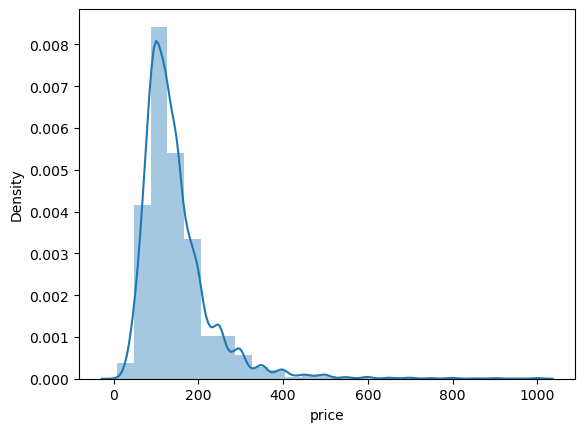

In [11]:
sns.distplot(df['price'], bins=25) # Shows extreme values

#### As per prior exercises, we already have a data set ready which contains ONLY prices below 406 (2 st. devs from mean) which we can leverage, but to begin with we will try with our main dataset.

In [12]:
df['price'].mean() # Check the mean

146.3912115794937

In [13]:
df['price'].median()

125.0

In [14]:
df['price'].max()

1000.0

### Section 3: Data Prep

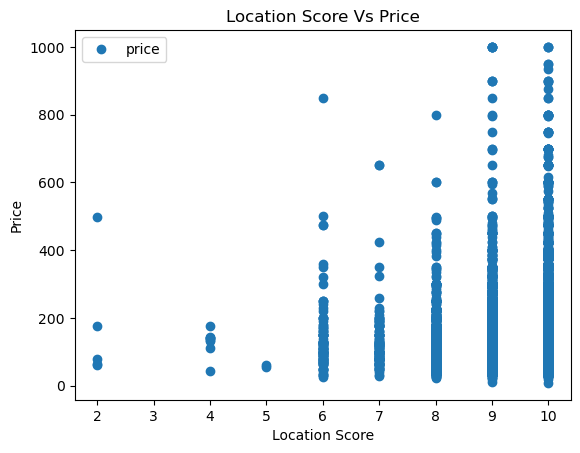

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'review_scores_location', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Location Score Vs Price')  
plt.xlabel('Location Score')  
plt.ylabel('Price')  
plt.show()
plt.figure.savefig(os.path.join(path2,'Location_Score_Price'),bbox_inches='tight')

In [16]:
# Reshape the variables into a NumPy arrays and put them into separate objects.

X = df['review_scores_location'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [17]:
X

array([[ 9.],
       [ 9.],
       [10.],
       ...,
       [10.],
       [10.],
       [10.]])

In [18]:
y

array([[ 59.],
       [160.],
       [ 80.],
       ...,
       [ 35.],
       [212.],
       [ 40.]])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [21]:
regression.fit(X_train, y_train)  # Fit the regression object onto the training set.

LinearRegression()

In [22]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### Section 4: Regression Analysis

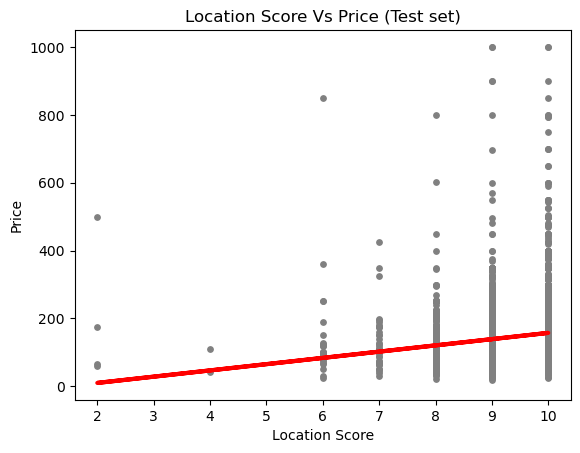

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Location Score Vs Price (Test set)')
plot_test.xlabel('Location Score')
plot_test.ylabel('Price')
plot_test.show()
plot_test.figure.savefig(os.path.join(path2,'Location_Score_Price_TEST'),bbox_inches='tight')

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [25]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[18.42913619]]
Mean squared error:  7362.861155801594
R2 score:  0.017654786913528064


#### The prediction model has far too much variance, and the Root MSE is extremely higher. Due to the lack of decimal points in the location scores, the spread of data is extremely concentrated on each X axis value and as a result, there isn't a really way to predict price from this dataset. We've already discussed how price is multifaceteted and would logically be determined by multiple factors (property size, location, finishing etc.) and as a result, it would be beneficial to use a more concrete location value with increased granularity AND/OR also breakdown these models into clearer groupings (e.g apartments / houses etc.) so there is less variation in the data set without the model being too specific.

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,60.0,139.034131
1,160.0,120.604995
2,85.0,139.034131
3,250.0,83.746722
4,200.0,139.034131
5,110.0,157.463267
6,175.0,157.463267
7,99.0,157.463267
8,542.0,157.463267
9,190.0,139.034131


In [27]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[18.42913619]]
Mean squared error:  6980.943119171664
R2 score:  0.02503477467873605


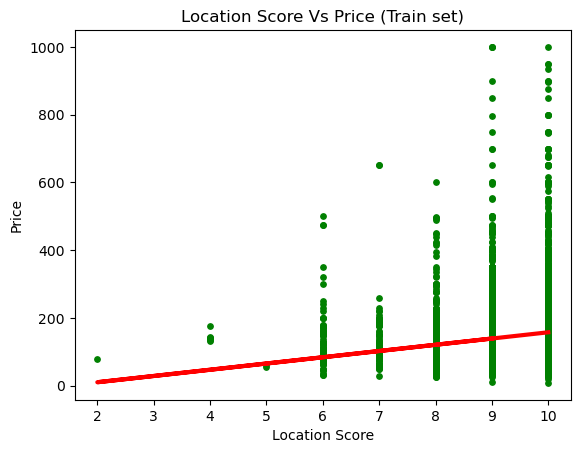

In [30]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Location Score Vs Price (Train set)')
plot_test.xlabel('Location Score')
plot_test.ylabel('Price')
plot_test.show()
plot_test.figure.savefig(os.path.join(path2,'Location_Score_Price_TRAIN'),bbox_inches='tight')

#### Even the training data set isn't particularly well plotted against the prediction line - Whilst this shows the model is certainly not overly specific to the training data set, it most definetly indicates (as with the R2 and MSE of the prior graph) that the predictions made are not particularly useful and as a result, the model needs to be iterated on.

### Section 5: Considerations & Iterations

#### The problem with the independant variable being used is that they are a subjective value which could be indicative of a specific factor, or a combination of multiple depending on the criteria a guest has decided to base their review off (e.g it could represent proximity to cultural hotspots OR proximity to transit routes OR quantity of amenities - cafes, shops, bars etc.). On the other hand, price is also a reflection of multiple factors (property type, room count, neighbourhood etc.) and as such, it might help our analysis to perform future iterations of this regression test using predefined subsets that still fit the datasize requirements.

#### Additionally, I believe that finding a way to objectively measure location would be beneficial. We already have an understanding of geography when using our choropleth maps from the prior achievement, but since those maps didn't have a numeric value representing distance from centre, and we were just using our eyes, I think it would be a great advantage to use Long / Lat values to find distance from Amsterdam Geographic Center and instead use distance scores instead of subjective location scores.

#### I've created a Distance value based on Lat/Long coordinates available in our DF and have used a constant 'Amsterdam Central' Lat/Long coordinate to use as a reference so that all values represent the distance from a singular point. The steps entailed using a Geopy and have been documented in a seperate script. The distance values (in Km.) are added to the DF which was originally imported at the start of the script in the column named 'distance from center'.

C:\Users\mojos\AppData\Local\Temp\ipykernel_17600\585152105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['distance_from_center'], bins=100) # Shows extreme values
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='distance_from_center', ylabel='Density'>

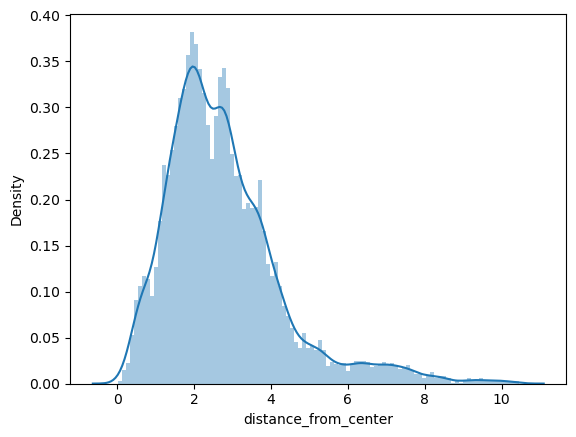

In [31]:
sns.distplot(df['distance_from_center'], bins=100) # Shows extreme values

In [32]:
df['distance_from_center'].describe()

count    17341.000000
mean         2.765804
std          1.533473
min          0.022202
25%          1.746802
50%          2.508415
75%          3.455269
max         10.440722
Name: distance_from_center, dtype: float64

#### value distribution is fairly consistent, without any extreme outliers. The distribution has a right skewed tail, Whilst we'll perform a preliminary analysis off the data we have infront of us, I'm prepared to work of a subset of the values under 6km if necessary to improve the model.

#### That being said, the variance in the data is unlikely to be caused by the distance 'outliers' but instead the spread of 'price' values

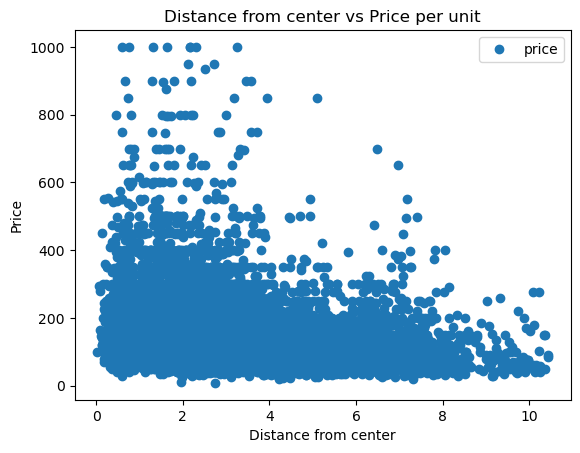

In [33]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'distance_from_center', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance from center vs Price per unit')  
plt.xlabel('Distance from center')  
plt.ylabel('Price')  
plt.show()
plt.figure.savefig(os.path.join(path2,'Distance_Price'),bbox_inches='tight')

In [34]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X2 = df['distance_from_center'].values.reshape(-1,1)
y2 = df['price'].values.reshape(-1,1)

In [35]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [36]:
#rerunning and fitting the regression:
regression = LinearRegression()
regression.fit(X_train2, y_train2)

LinearRegression()

In [37]:
# Predict.

y_predicted2 = regression.predict(X_test2)

In [38]:
rmse = mean_squared_error(y_test2, y_predicted2)
r2 = r2_score(y_test2, y_predicted2)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-10.95271269]]
Mean squared error:  7172.15884143967
R2 score:  0.04309808968317708


#### Using an 'objective' value has improved the model (when evaluating based on R2 score, though it's still not great due to variance in prices.  The negative slope is still enabling us to understand that we are on the right trakc with our hypotheiss, that prices decrease as we move out of the city, but there is still to much variance. As explained previously, I think stronger evidence will be found when reviewing specific catagorical subgroups of the data.

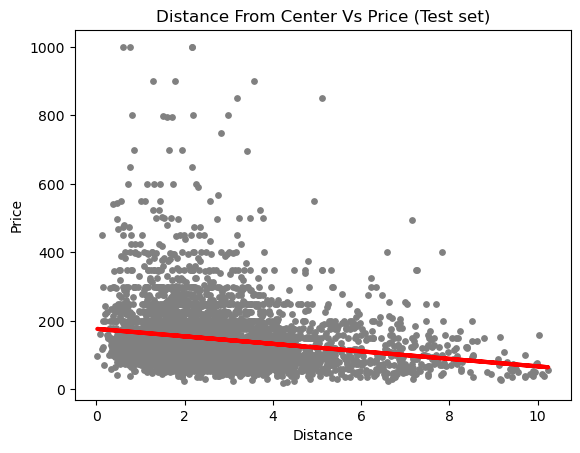

In [40]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test2, y_test2, color='gray', s = 15)
plot_test.plot(X_test2, y_predicted2, color='red', linewidth =3)
plot_test.title('Distance From Center Vs Price (Test set)')
plot_test.xlabel('Distance')
plot_test.ylabel('Price')
plot_test.show()
plot_test.figure.savefig(os.path.join(path2,'Distance_Price'),bbox_inches='tight')

### Reviewing subgroupings and iterating on the model

In [41]:
df.columns

Index(['id', 'name', 'summary', 'host_id', 'host_is_superhost',
       'neighbourhood', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'rated', 'pricing_tier', 'group_size',
       'groupsize_pricing_combined', 'distance_from_center'],
      dtype='object')

In [42]:
df['group_size'].value_counts(dropna = False)

group_size
Small     9832
Medium    6729
Large      780
Name: count, dtype: int64

#### Due to the inherent variabilty in the prices (identified previously in the frequency chart) I've also decided to iterate our model using values under 406, which represents 2 deviations from the mean. This only reduces our data size by 206 which isn't too drastic.

In [43]:
df2 = df[df['price']<=406]
df_over406 = df[df['price']>406]
df_over406.shape

(268, 31)

#### Given the data set size, we could reasonably train the model based off the small and medium cohorts (above 5k records) but not the large.

In [44]:
df_small = df2[df2['group_size']=='Small']
df_mid = df2[df2['group_size']=='Medium']
df_small.shape

C:\Users\mojos\AppData\Local\Temp\ipykernel_17600\976753287.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_small['price'], bins=25) # Shows extreme values
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

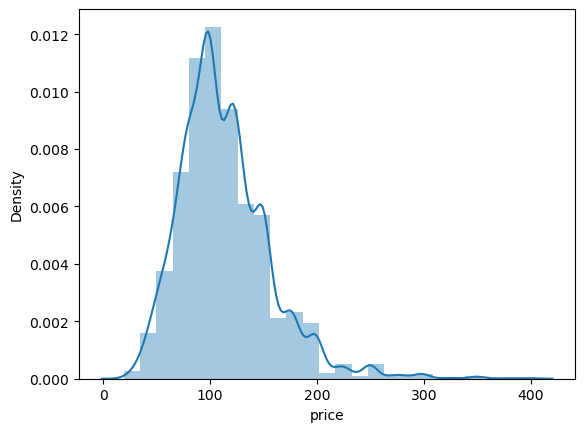

In [46]:
sns.distplot(df_small['price'], bins=25) # Shows extreme values

In [47]:
#Reshaping data
X_3 = df_small['distance_from_center'].values.reshape(-1,1)
y_3 = df_small['price'].values.reshape(-1,1)

In [48]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

In [49]:
regression = LinearRegression()  
regression.fit(X_train_3, y_train_3)

LinearRegression()

In [50]:
# Predict.

y_predicted_3 = regression.predict(X_test_3)

In [51]:
rmse = mean_squared_error(y_test_3, y_predicted_3)
r2 = r2_score(y_test_3, y_predicted_3)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-9.96865667]]
Mean squared error:  1657.2246727486627
R2 score:  0.1259194686557189


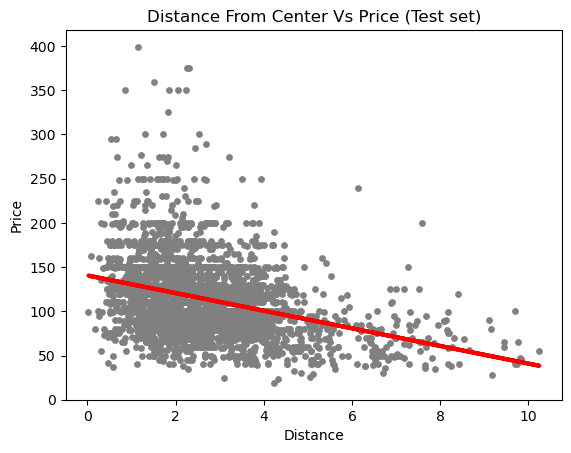

In [52]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_3, y_test_3, color='gray', s = 15)
plot_test.plot(X_test_3, y_predicted_3, color='red', linewidth =3)
plot_test.title('Distance From Center Vs Price (Test set)')
plot_test.xlabel('Distance')
plot_test.ylabel('Price')
plot_test.show()
plot_test.figure.savefig(os.path.join(path2,'Distance_Price_Small_TEST'),bbox_inches='tight')

#### This test performed remarkably better than the others actioned previously. The variance is much lower (but still not fantastic) and the MSE is significantly reduced. 

In [53]:
# Predict.

y_predicted_train_3 = regression.predict(X_train_3) # This is predicting X_train!

In [54]:
rmse = mean_squared_error(y_train_3, y_predicted_train_3)
r2 = r2_score(y_train_3, y_predicted_train_3)

In [55]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-9.96865667]]
Mean squared error:  1657.2428420933838
R2 score:  0.11293133531290711


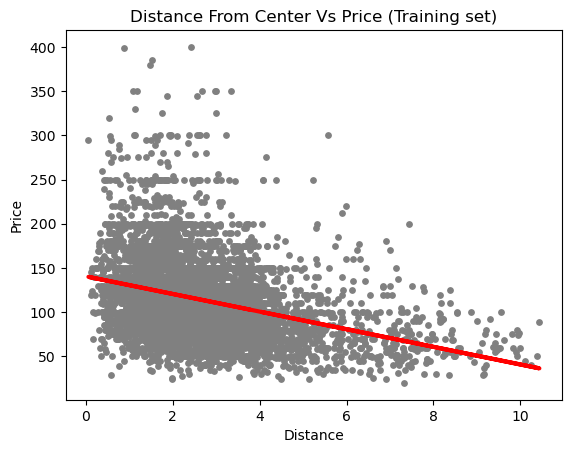

In [56]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train_3, y_train_3, color='gray', s = 15)
plot_test.plot(X_train_3, y_predicted_train_3, color='red', linewidth =3)
plot_test.title('Distance From Center Vs Price (Training set)')
plot_test.xlabel('Distance')
plot_test.ylabel('Price')
plot_test.show()
plot_test.figure.savefig(os.path.join(path2,'Distance_Price_Small_TRAIN'),bbox_inches='tight')

#### Interestingly the training set is marginally less precise than on the test set. The model is definelty not overfitted

#### Reviewing the Mid details;

In [57]:
df_mid.shape

(6591, 31)

C:\Users\mojos\AppData\Local\Temp\ipykernel_17600\1726462530.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mid['price'], bins=25)
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

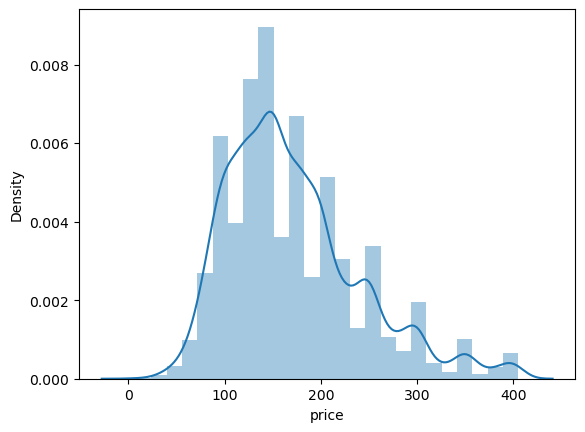

In [58]:
sns.distplot(df_mid['price'], bins=25)

In [59]:
#Reshaping data
X_4 = df_mid['distance_from_center'].values.reshape(-1,1)
y_4 = df_mid['price'].values.reshape(-1,1)

In [60]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.3, random_state=0)

In [61]:
regression = LinearRegression()  
regression.fit(X_train_4, y_train_4)

LinearRegression()

In [62]:
# Predict.

y_predicted_4 = regression.predict(X_test_4)

In [63]:
rmse = mean_squared_error(y_test_4, y_predicted_4)
r2 = r2_score(y_test_4, y_predicted_4)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-11.14921552]]
Mean squared error:  4397.456947559406
R2 score:  0.07918804039123972


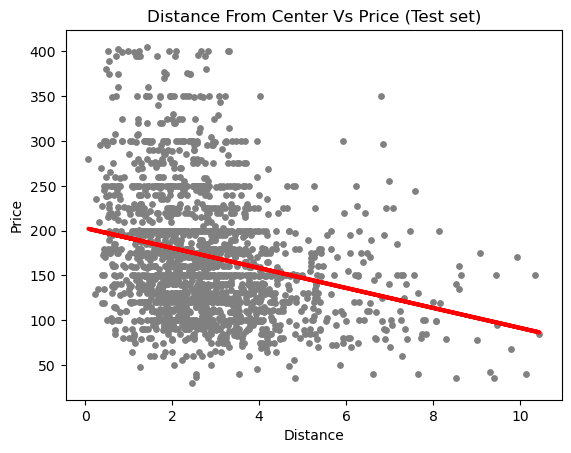

In [64]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_4, y_test_4, color='gray', s = 15)
plot_test.plot(X_test_4, y_predicted_4, color='red', linewidth =3)
plot_test.title('Distance From Center Vs Price (Test set)')
plot_test.xlabel('Distance')
plot_test.ylabel('Price')
plot_test.show()
plot_test.figure.savefig(os.path.join(path2,'Distance_Price_medium_TEST'),bbox_inches='tight')

#### The medium sized listing cohort appears to have increased variability when compared to the smaller listings. There is some logic as to why these data sets don't have the same degree of accuracy. I think it's because 'typically' a property consisting of 1-2 guest would perhaps be fairly formulaic (1 bed apartment, or maybe studio/bachelor) where as there is inevitably more iterations on how to lodge 3-4 guests (2 private bedrooms + sofa bed, 1 Private room + Sofa bed in shared space, 2 Beds in the same room etc.) The layout would play a role in price setting so I can see why it's harder to predict the prices for the larger properties / group sizes.

### Plotting the model against the training data to ensure it isn't overfitted.

In [65]:
# Predict.

y_predicted_train_4 = regression.predict(X_train_4) # This is predicting X_train!

In [66]:
rmse = mean_squared_error(y_train_4, y_predicted_train_4)
r2 = r2_score(y_train_4, y_predicted_train_4)

In [67]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-11.14921552]]
Mean squared error:  4493.728593421283
R2 score:  0.06711634963946622


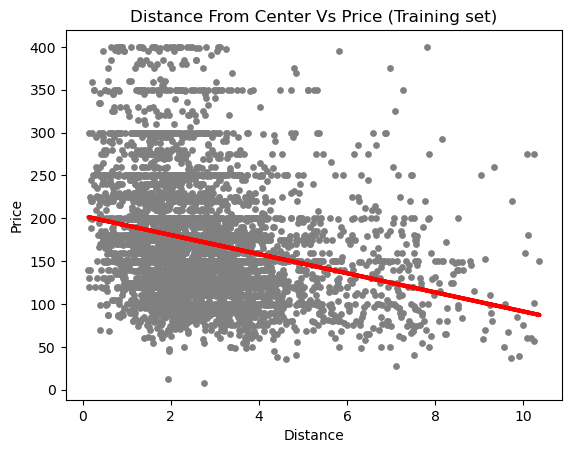

In [68]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train_4, y_train_4, color='gray', s = 15)
plot_test.plot(X_train_4, y_predicted_train_4, color='red', linewidth =3)
plot_test.title('Distance From Center Vs Price (Training set)')
plot_test.xlabel('Distance')
plot_test.ylabel('Price')
plot_test.show()
plot_test.figure.savefig(os.path.join(path2,'Distance_Price_medium_TRAIN'),bbox_inches='tight')

#### Plotting the model against the training data we again have a marginal increase in it's deviatiation from actuals implying that it's not overfitted.

## Conclusion

### No Matter which way we review the data it's clear that the hypothesis relating to distance from center negatively impacting listing price point is by & large correct. Each of the models generated show a neagtive slope (inverse for the original location score, due to the nature of the values) which supports our hypothesis. HOWEVER whilst our models support our ideas, the inacurrancy indicates that there are a plethora of other factors at play here which determine pricing. (many of which we have discussed in prior scripts or in our project overview file). Future iterations of the model would require more dimensionality.

### In regards to potential data biases in the models created, I don't think our removal of values above 406  resulted in any biases in the model (as made evident by the complete lack of overfitting). The severity of the clustering around the 150/200 Euro mark prevented the few larger values from impacting the predictions. Whilst our decision to focus on subgroupings helped improve the accuracy of our model, It wasn't a detreiment o it's impartiality'. I think this is because in a real life situation relating to house prices or rental pricing, one would need to make predictions that pertain to data from similar properties, as opposed to all of the properties listed on the market.